## 案例一

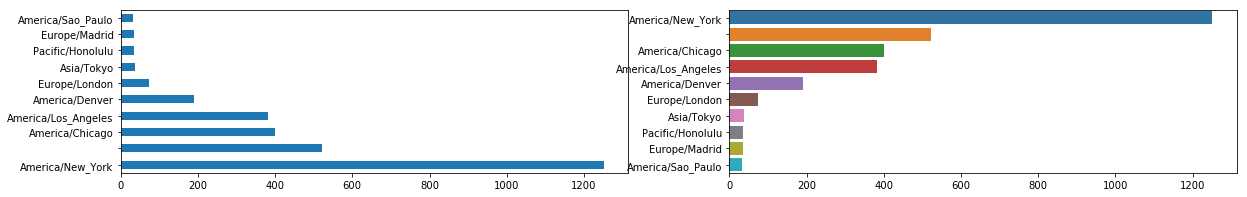

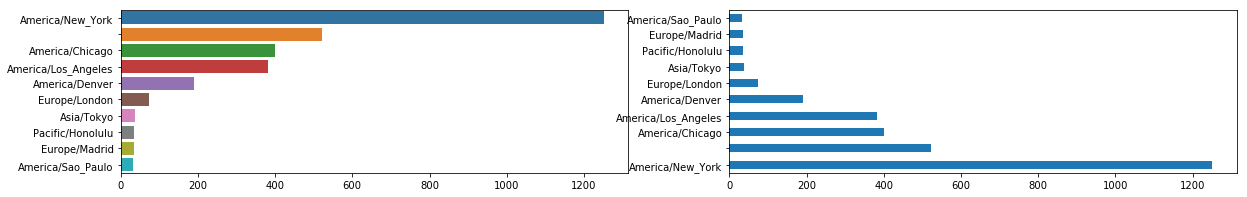

In [7]:
# python内置的json
import json
import pandas as pd
import matplotlib.pyplot as plt
# 全局配置
plt.rc('figure', figsize=(20, 3))
import seaborn as sn

example1 = 'datasets/bitly_usagov/example.txt'
# 读取文本文件
# 1. 常规写法
fobj = open(example1)
records = []
for line in fobj:
    item = json.loads(line)
    records.append(item)

# 2. 行表达式
records = [json.loads(line) for line in open(example1)]
# 访问第一个字典
records[0]

# 直接放置到DataFrame里面
'''
列表里面的字典key作为列索引
行索引默认为0~n-1
'''
df = pd.DataFrame(records)
# 过滤,查看缺失值
df['tz'].isnull()
df[df['tz'].isnull()]

# 查看行
df.loc[13]

# 填充tz列缺失值
# print(df[df['tz'].isnull()]['tz'])
df['tz'].fillna('Missing')
# 填充空字符串数据
# df['tz'][df['tz'] == ''] = 'Unknown'
df.loc[13]

# 目标一：对时区进行计数，统计每个时区用户的访问量
# Series方法，value_counts做计数
tz_counts = df['tz'].value_counts()

'''
第一种绘图方法：采用pandas的绘图函数plot
第1种使用方式：subplots函数
第2种使用方式：先创建figure画布对象，然后调用add_subplot添加子图
''' 
# 第1种
fig, axes = plt.subplots(1, 2)
# 绘制水平柱状图
tz_counts[:10].plot.barh(ax=axes[0])
# 第2种
fig1 = plt.figure()
# 参数：1行2列1位置
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)
tz_counts[:10].plot.barh(ax=ax2)

'''
第二种绘图方法：采用seaborn库
seaborn：matplotlib增强版，修改了matplotlib原有的颜色方案
'''
sn.barplot(x=tz_counts[:10].values, y=tz_counts[:10].index, ax=axes[1])
sn.barplot(x=tz_counts[:10].values, y=tz_counts[:10].index, ax=ax1)

## 目标二：查看每个时区使用Windows和非Windows系统的访问量

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
                        ...  
Europe/Sofia              1.0
Europe/Volgograd          1.0
America/Lima              1.0
America/La_Paz            1.0
America/Mazatlan          1.0
Length: 97, dtype: float64

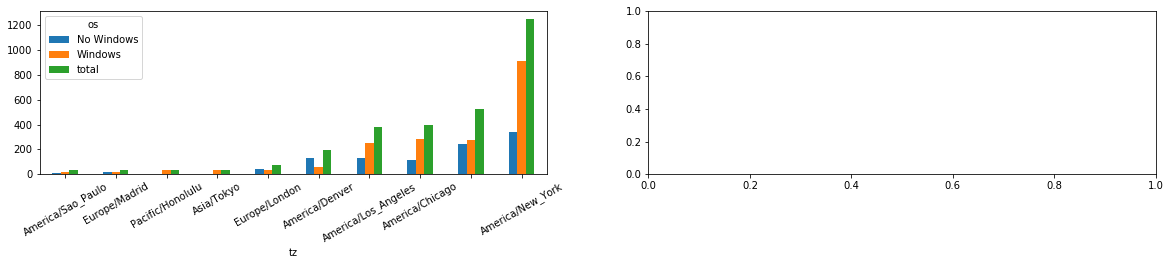

In [48]:
import numpy as np
# 判断是否是Windows，采用字符串包含
win = df['a'].str.contains('Windows')
# np.where(条件，条件为True对应的值，条件为False对应的值)
# 条件返回一个字符串
win2 = np.where(win, 'Windows', 'No Windows')
# 新增OS，把数组放回去
df['os'] = win2
df2 = df[['tz', 'os']]
# print(df2)
# 对时区和os分组，求数量
df3 = df2.groupby(['tz', 'os']).size()
# 填充缺失值得函数，将数值为0
df4 = df3.unstack()[['No Windows', 'Windows']].fillna(0)

# 第一种排序
# 求两列和
df4['total'] = df4['No Windows'] + df4['Windows']
# 排序去最后10个
df5 = df4.sort_values(by='total')[-10:]
fig, axes = plt.subplots(1, 2)
# 绘制水平柱状图
df5.plot.bar(ax=axes[0], rot=30)

# 第二种排序
# 函数应用
# 删除total列
# DataFrame对象调用apply函数传递对象本身的每一列
df6 = df4.drop('total', axis = 1)
def total_func(x):
    return x.sum()
# axis=1对每一行求和
df6.apply(total_func, axis = 1).sort_values(ascending=False)